# 0. Introduction

**Dataset**  
* [abalone(전복)](https://github.com/MyungKyuYi/AI-class/blob/main/abalone.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**  
* 전복 데이터를 가지고, 머신러닝 분류, ~회귀~ / 신경망 분류, ~회귀~를 각각 수행하라. 레이블은 둘다 Ring

## 0.1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/abalone.csv')
df

id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 10 columns]

In [3]:
# dataset의 shape, columns 확인
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape: (4177, 10)
Columns: Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [4]:
# missing value를 확인하는 방법 두 가지
# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")
# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): print("There are no missing values.")
print("\n\n")

# 또한 이를 응용하여 null이 존재한다면 자동으로 처리하는 if statement를 작성 가능
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None



id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64



There are no missing values.



There are no missing values.


> **cf. [pandas.DataFrame.dropna — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**  
`DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)`  
Remove missing values.

> **cf. [누락 데이터(Missing value)를 처리하는 7가지 방법 / Data Imputation - 밥먹는 개발자](https://dining-developer.tistory.com/19)**

In [5]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%    1044.000000     0.450000     0.350000     0.115000      0.441500   
50%    2088.000000     0.545000     0.425000     0.140000      0.799500   
75%    3132.000000     0.615000     0.480000     0.165000      1.153000   
max    4176.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     1.000000  
25%          0.186000        0.093500      0.130000     8.000000  
50%          0.336000        0.171000      0.234000     9.000000  
75%          0.502000        0.253000      0.329000    11.000000  
max          1.488000        0.760000      1.005000    29.000000

> **cf. [pandas.DataFrame.describe — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)**  
`DataFrame.describe(percentiles=None, include=None, exclude=None)`  
Generate descriptive statistics.

In [6]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [7]:
# columns description
'''
| Sex               | 
| Length            | 
| Diameter          | 
| Height            | 
| Whole_weight      | 
| Shucked_weight    | 
| Viscera_weight    | 
| Shell_weight      |
| Rings(Label)      | 
'''

'\n| Sex               | \n| Length            | \n| Diameter          | \n| Height            | \n| Whole_weight      | \n| Shucked_weight    | \n| Viscera_weight    | \n| Shell_weight      |\n| Rings(Label)      | \n'

In [8]:
# Label의 class 종류 및 count 확인
labels = np.unique(df['Rings'], return_counts=True)
print(labels)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]), array([  1,   1,  15,  57, 115, 259, 391, 568, 689, 634, 487, 267, 203,
       126, 103,  67,  58,  42,  32,  26,  14,   6,   9,   2,   1,   1,
         2,   1]))


> **cf. [numpy.unique — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)**  
Find the unique elements of an array.  
Returns the sorted unique elements of an array.  
There are three optional outputs in addition to the unique elements:  
> * the indices of the input array that give the unique values
> * the indices of the unique array that reconstruct the input array
> * the number of times each unique value comes up in the input array

In [9]:
# Check the label count - sol1. numeric table
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")


<label count>
Rings  count
    1      1
    2      1
    3     15
    4     57
    5    115
    6    259
    7    391
    8    568
    9    689
   10    634
   11    487
   12    267
   13    203
   14    126
   15    103
   16     67
   17     58
   18     42
   19     32
   20     26
   21     14
   22      6
   23      9
   24      2
   25      1
   26      1
   27      2
   29      1


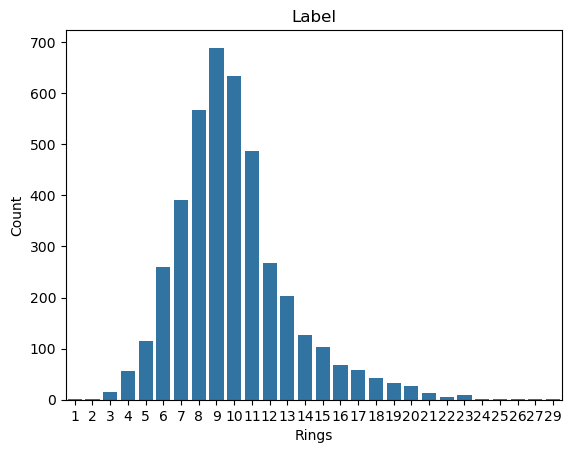

In [10]:
# Check the label count - sol2. graph
sns.countplot(data=df, x='Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Label')
plt.show()

> 딱 봤을 때 **data 분포가 쏠려 있어서** 특정 Rings를 가지는 경우에 대해서는 제대로 학습하지 못할 것이 우려된다.

In [11]:
# Sex에 대해서 missing value도 없음을 확인했으니 numeric하게 바꾸자

# categorical value를 각각 int에 mapping
np.unique(df['Sex']) # prints 'F', 'I', 'M'
sex_mapping = {'M': 0, 'F': 1, 'I': 2} # I는 성별을 구분할 수 없는 '유아기'를 의미함
df['Sex'] = df['Sex'].map(sex_mapping)

df

id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0    0   0.455     0.365   0.095        0.5140          0.2245   
1        1    0   0.350     0.265   0.090        0.2255          0.0995   
2        2    1   0.530     0.420   0.135        0.6770          0.2565   
3        3    0   0.440     0.365   0.125        0.5160          0.2155   
4        4    2   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ...     ...       ...     ...           ...             ...   
4172  4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176  4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 10 columns]

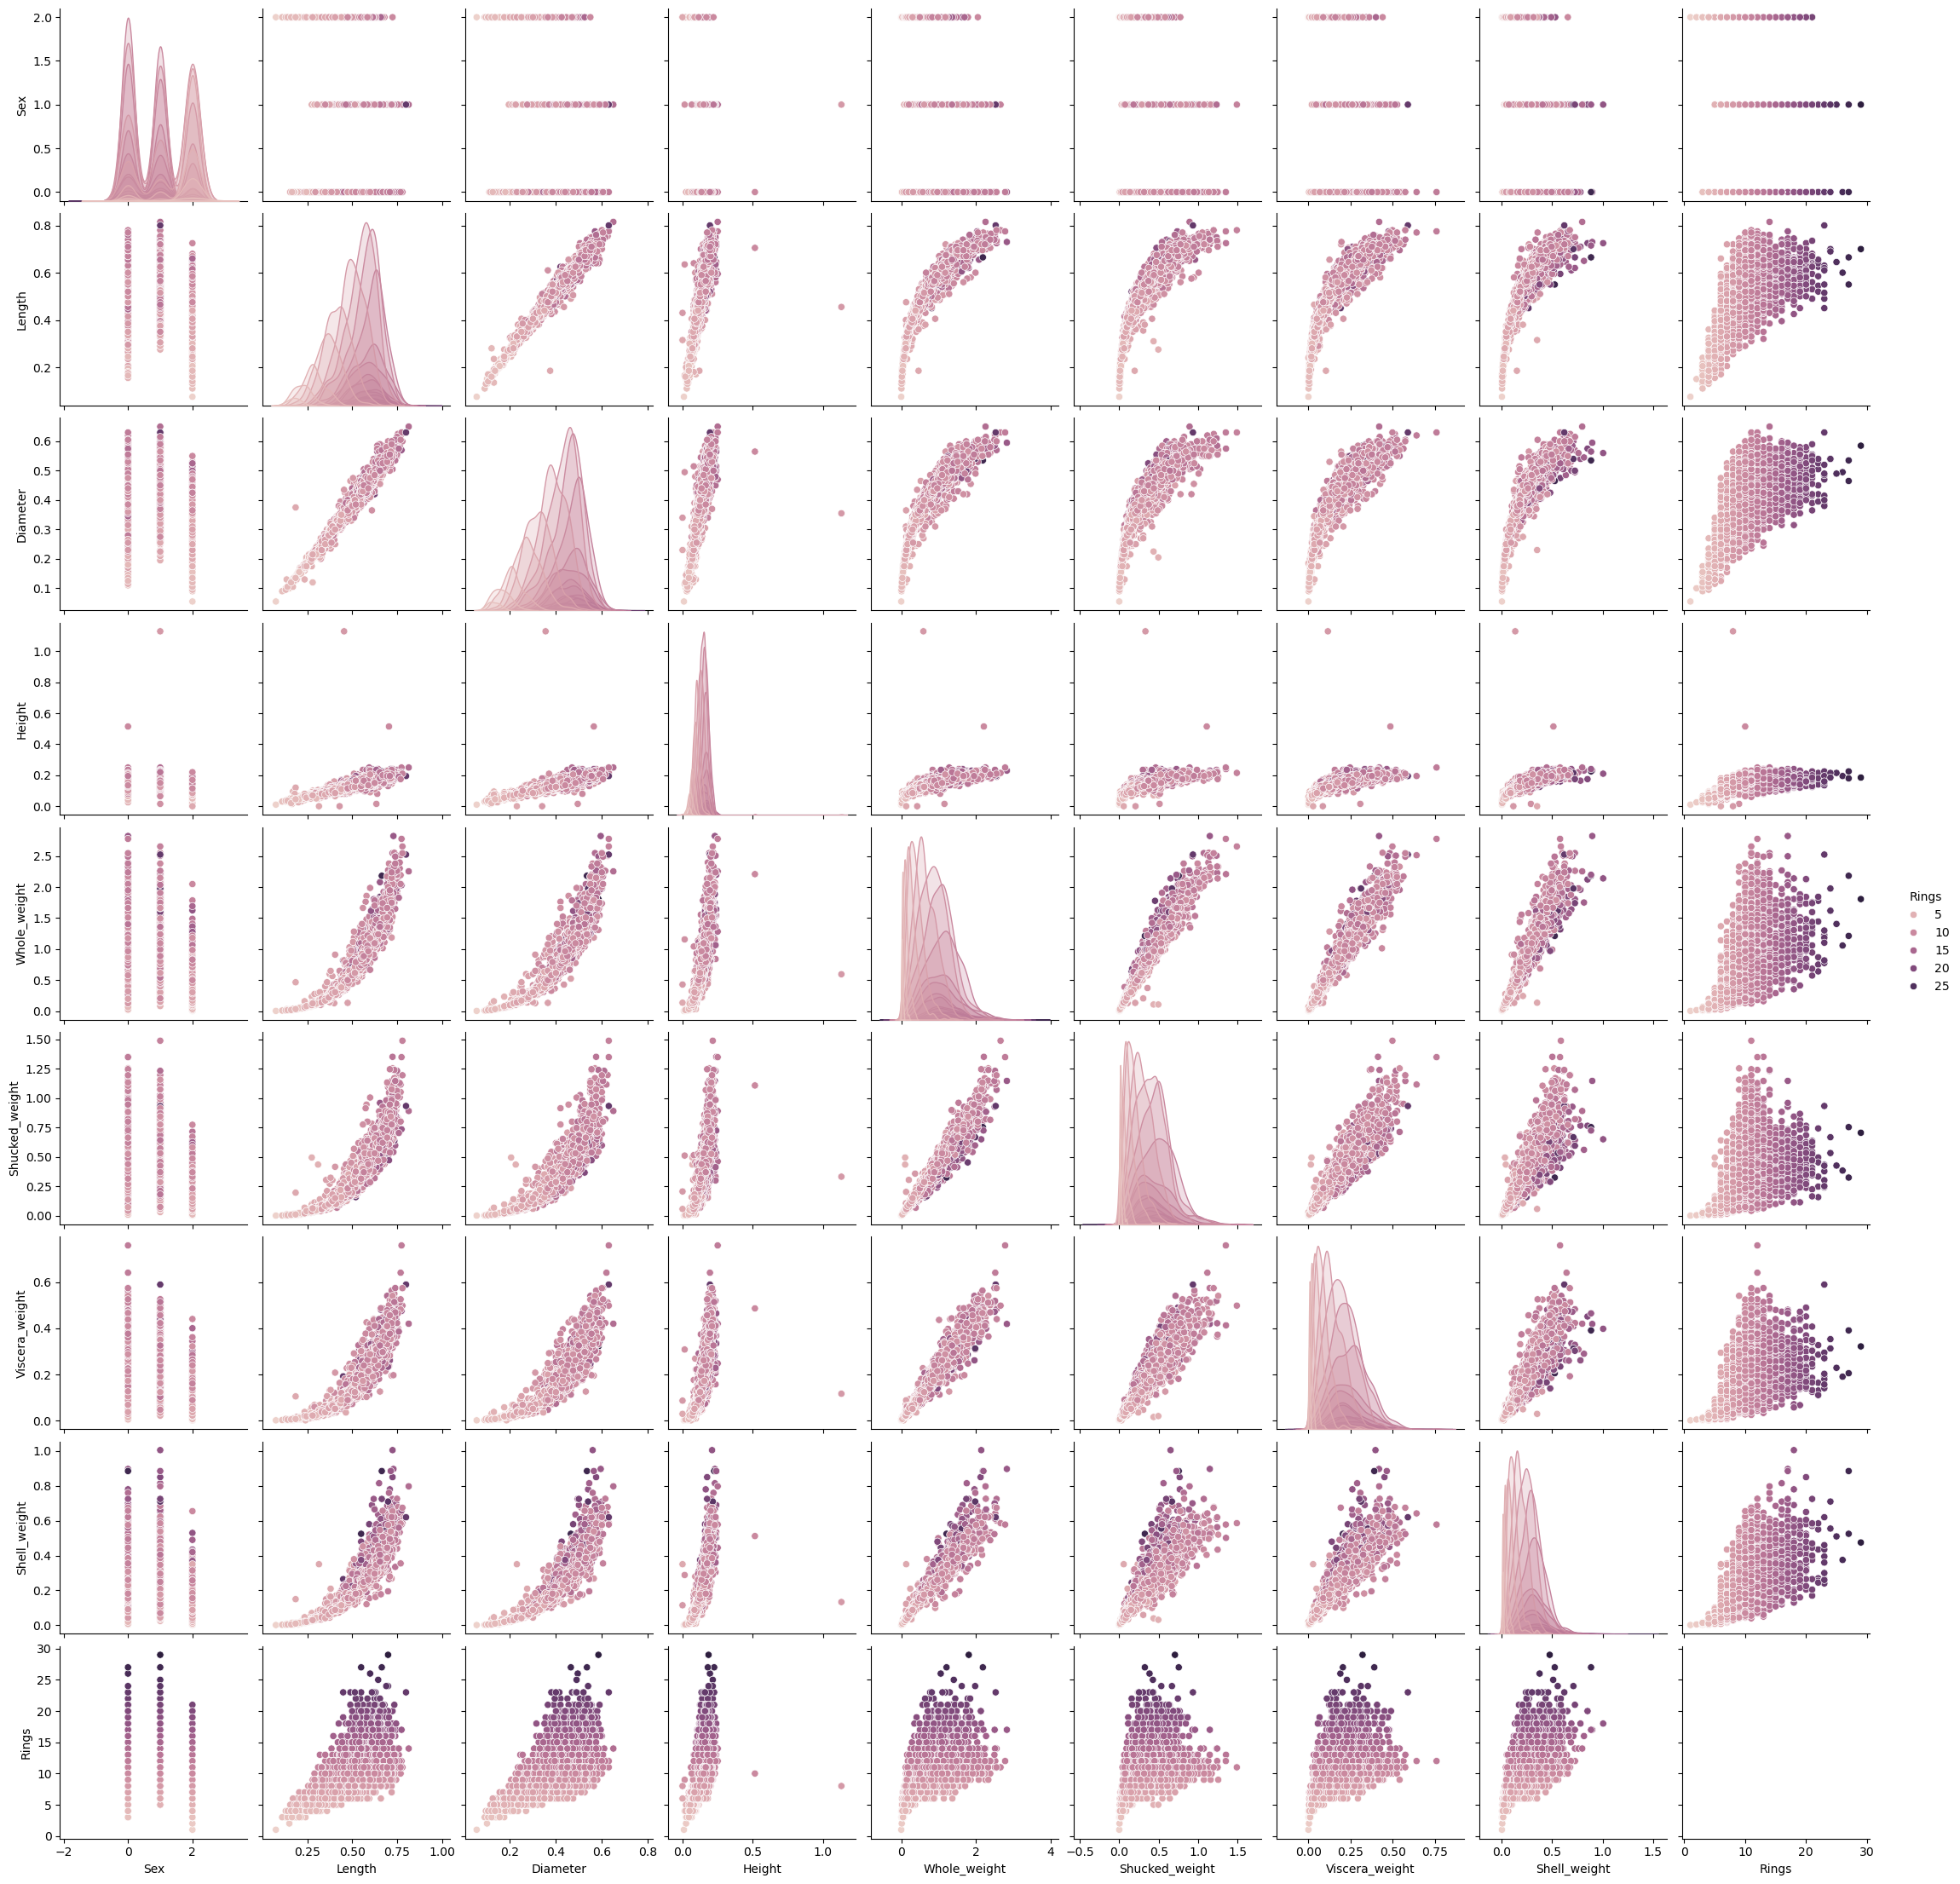

In [12]:
# Check the correlations(2) by pairplot
sns.pairplot(data=df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                   'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
             hue='Rings')
plt.show()

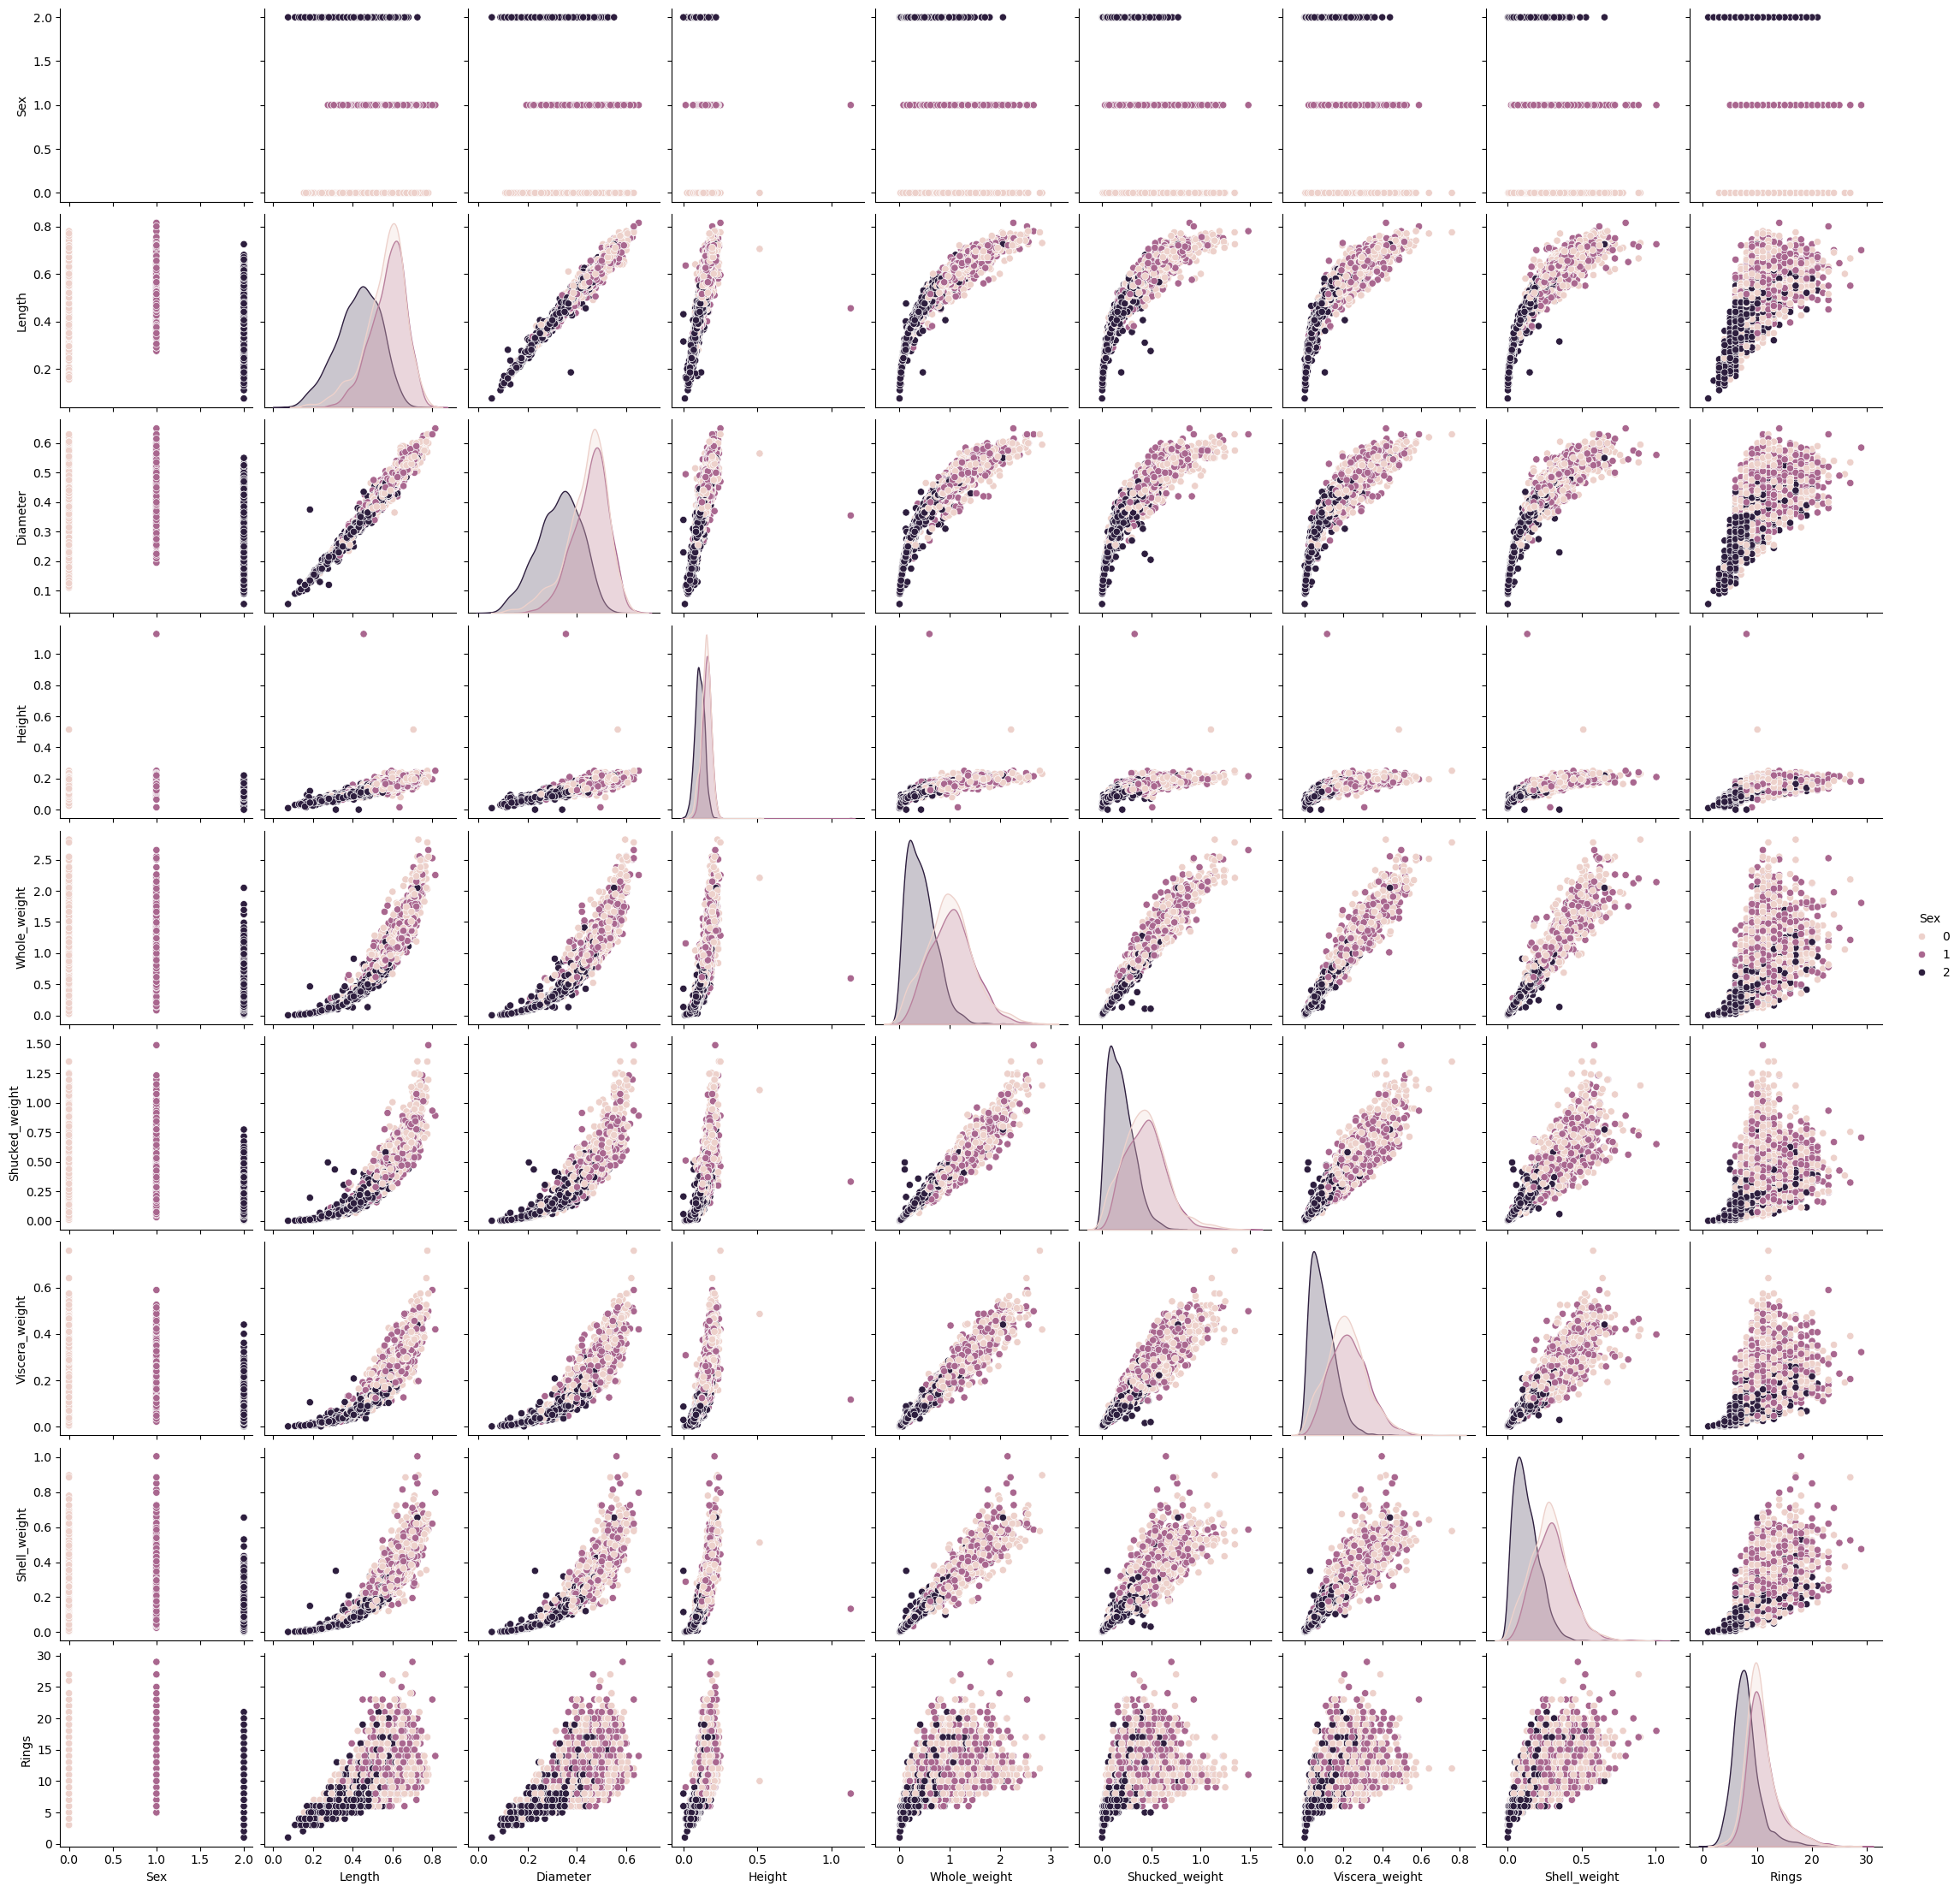

In [13]:
# Check the correlations(2) by pairplot
sns.pairplot(data=df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                   'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
             hue='Sex')
plt.show()

# 1. ML

### 1.0.0. Split the dataset

In [14]:
# 1. Split the dataset into features(X) and label(y)
# 2. convert pandas-DataFrame to numpy-ndarray
X = df.drop(['id', 'Sex', 'Rings'], axis=1).to_numpy() # 'Sex'도 일단 빼버리겠음
y = df['Rings'].to_numpy()

print(f"X is {type(X)}, y is {type(y)} \n")
print(f"X.head \n{X[:5]} \n")
print(f"y.head \n{y[:5]} \n")

X is <class 'numpy.ndarray'>, y is <class 'numpy.ndarray'> 

X.head 
[[0.455  0.365  0.095  0.514  0.2245 0.101  0.15  ]
 [0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]
 [0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]
 [0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ]] 

y.head 
[15  7  9 10  7] 



> **cf. [pandas.DataFrame.drop — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)**  
Drop specified labels from rows or columns.  
Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the user guide for more information about the now unused levels.    
**cf. [09-04. 행/열 삭제 (drop) - [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복](https://wikidocs.net/154050)**

> **cf. [pandas.DataFrame.to_numpy — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)**  
Convert the DataFrame to a NumPy array.  
By default, the dtype of the returned array will be the common NumPy dtype of all types in the DataFrame. For example, if the dtypes are float16 and float32, the results dtype will be float32. This may require copying data and coercing values, which may be expensive.
>    > **`.to_numpy()` 대신에 `.values`를 사용하는 코드들도 존재한다.**  
>    > **cf. [DOC: warning against use of .values should show difference compared to to_numpy()/array · Issue #48425 · pandas-dev/pandas](https://github.com/pandas-dev/pandas/issues/48425)**  
>    > Both methods will produce the same output. However, `.to_numpy()` is preferred for its flexibility and better integration with Pandas.

In [15]:
# Split the dataset into train_set and test_set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

X_train: Shape (3341, 7) 
X_test:  Shape (836, 7)
y_train: Shape (3341,) 
y_test:  Shape (836,)


### 1.0.1. Standardization

In [16]:
# Standardize the features scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_scaled.head \n{X_train_scaled[:5]}")

X_train.head 
[[0.55   0.445  0.125  0.672  0.288  0.1365 0.21  ]
 [0.475  0.355  0.1    0.5035 0.2535 0.091  0.14  ]
 [0.305  0.225  0.07   0.1485 0.0585 0.0335 0.045 ]
 [0.275  0.2    0.065  0.1165 0.0565 0.013  0.035 ]
 [0.495  0.38   0.135  0.6295 0.263  0.1425 0.215 ]] 

X_train_scaled.head 
[[ 0.21017452  0.36972535 -0.34795017 -0.32316418 -0.32540694 -0.40512998
  -0.21213236]
 [-0.41944448 -0.5423862  -0.93608206 -0.66598541 -0.48012641 -0.82093157
  -0.71241871]
 [-1.84658088 -1.85988065 -1.64184034 -1.3882497  -1.35462776 -1.34639511
  -1.39137875]
 [-2.09842848 -2.11324497 -1.75946671 -1.45335522 -1.36359701 -1.53373429
  -1.46284823]
 [-0.25154608 -0.28902188 -0.11269741 -0.40963244 -0.43752249 -0.350299
  -0.17639762]]


> **cf. [StandardScaler — scikit-learn 1.5.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**  
Standardize features by removing the mean and scaling to unit variance.  
The standard score of a sample x is calculated as:  
$ z = \frac{x-u}{s} $  
> * $z$: 표준화된 값
> * $x$: 표준화할 값
> * $u$: mean of the training samples
> * $s$: the standard deviation of the training samples

## 1.1. K-NN Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train_scaled, y_train)
kn.score(X_train_scaled, y_train)

0.45255911403771326

In [18]:
# Accuracy of the predicted values

from sklearn.metrics import classification_report, confusion_matrix

y_pred = kn.predict(X_test_scaled)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           3       0.11      0.33      0.17         3
           4       0.29      0.38      0.33        13
           5       0.21      0.19      0.20        32
           6       0.24      0.35      0.29        48
           7       0.24      0.26      0.25        84
           8       0.22      0.31      0.26        99
           9       0.30      0.36      0.32       142
          10       0.28      0.27      0.28       139
          11       0.26      0.24      0.25        93
          12       0.08      0.06      0.07        51
          13       0.00      0.00      0.00        31
          14       0.29      0.08      0.12        26
          15       0.17      0.05      0.07        21
          16       0.20      0.08      0.11        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.2. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2813528883567794

In [20]:
# Accuracy of the predicted values
y_pred = lr.predict(X_test_scaled)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.47      0.69      0.56        13
           5       0.61      0.34      0.44        32
           6       0.27      0.25      0.26        48
           7       0.35      0.35      0.35        84
           8       0.30      0.46      0.36        99
           9       0.28      0.39      0.33       142
          10       0.22      0.26      0.24       139
          11       0.25      0.28      0.26        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.3. Decision Tree
DT의 경우에는 features에 대해서 scale standardization을 하지 않아도 된다.  
또한 오히려 하지 않는 편이 인간이 model을 파악하기에 유용하다.

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)   # non-scaled X로 fitting
dt.score(X_train, y_train) # print 1.0

# overfitting

1.0

In [22]:
# overfitting 해소
dt.max_depth = 5 # max_depth 조정
dt.fit(X_train, y_train)
dt.score(X_train, y_train) # prints 0.824104...

0.3038012571086501

In [23]:
# Accuracy of the predicted values
y_pred = dt.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.43      0.77      0.56        13
           5       0.45      0.47      0.46        32
           6       0.55      0.12      0.20        48
           7       0.34      0.39      0.36        84
           8       0.25      0.25      0.25        99
           9       0.25      0.37      0.30       142
          10       0.25      0.37      0.30       139
          11       0.31      0.25      0.28        93
          12       0.00      0.00      0.00        51
          13       0.07      0.16      0.10        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 1.4. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_train, y_train) # prints 0.85504...

0.31816821310984733

In [25]:
# Accuracy of the predicted values
y_pred = rf.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.38      0.77      0.51        13
           5       0.43      0.31      0.36        32
           6       0.44      0.31      0.37        48
           7       0.41      0.49      0.45        84
           8       0.31      0.45      0.37        99
           9       0.24      0.32      0.28       142
          10       0.22      0.35      0.27       139
          11       0.28      0.28      0.28        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.5. Support Vector Machine

In [26]:
from sklearn.svm import SVC # Support Vector Classification

svm = SVC(kernel = 'linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)
svm.score(X_train_scaled, y_train)

0.27327147560610593

In [27]:
# Accuracy of the predicted values
y_pred = rf.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.38      0.77      0.51        13
           5       0.43      0.31      0.36        32
           6       0.44      0.31      0.37        48
           7       0.41      0.49      0.45        84
           8       0.31      0.45      0.37        99
           9       0.24      0.32      0.28       142
          10       0.22      0.35      0.27       139
          11       0.28      0.28      0.28        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
r_squared_train = lr.score(X_train_scaled, y_train)
r_squared_test = lr.score(X_test_scaled, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

# Linear regression은 기본적으로 R-squared 즉, Coefficient of determination을 리턴한다.
# 하지만 이는 직관성이 부족하므로 관례적으로 MSE를 performance 측정에 사용한다(다음 cell).

R-squared-train: 0.5260176935365598
R-squared-test : 0.5329844757724522


In [29]:
# MSE 계산
from sklearn.metrics import mean_squared_error

y_preds = lr.predict(X_test_scaled) # predicted value for data instances

# How to get the MSE - sol1. scikit-learn library 사용
print(f"sol1. MSE: {mean_squared_error(y_preds, y_test)}")

# How to get the MSE - sol2. numpy만 사용하여 직접 계산
def mse_np(predicted, actual):
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)
print(f"sol2. MSE: {mse_np(y_preds, y_test)}")

# How to get the MSE - sol3. python만 사용하여 직접 계산
def mse_py(predicted, actual):
    # numpy를 사용하면 broadcasting 기능 덕분에 아래 2 lines가 내부적으로 수행되는 것 뿐임.
    sum_squared_error = sum((p - a) ** 2 for p, a in zip(predicted, actual))
    mean_squared_error = sum_squared_error / len(actual)
    return mean_squared_error
print(f"sol3. MSE: {mse_py(y_preds, y_test)}")

# X_test_scaled datainstance들을 Linear regression model에 넣었을 때의 예측값 확인
print(f"\ny_preds.head: \n{np.round(y_preds[:10], 2)}")
print(f"\ny_actual.head: \n{y_test[:10]}")
print(f"\nMSE.head: \n{((np.array(y_preds) - np.array(y_test)) ** 2)[:10]}")

sol1. MSE: 5.055541144299382
sol2. MSE: 5.055541144299382
sol3. MSE: 5.055541144299385

y_preds.head: 
[11.6   9.97 13.97 11.95 10.83 10.65  9.83  8.75  7.45 10.7 ]

y_actual.head: 
[ 9  8 16  9 14 11  7  6  7 10]

MSE.head: 
[ 6.76596169  3.869935    4.13018967  8.73009832 10.07745611  0.12389907
  8.02472606  7.54062159  0.20270069  0.48811854]


> **cf. [numpy.round — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.round.html)**  
`numpy.round(x, decimals=0, out=None)`  
Evenly round to the given number of decimals.

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5,
                           random_state=42)
dt.fit(X_train, y_train)
r_squared_train = dt.score(X_train, y_train)
r_squared_test = dt.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.5445430674354181
R-squared-test : 0.49731518390819296


In [31]:
y_preds = dt.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 5.441668720906287


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3,
                           random_state=42)
rf.fit(X_train, y_train)
r_squared_train = rf.score(X_train, y_train)
r_squared_test = rf.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.4640927411843081
R-squared-test : 0.4286561767872885


In [33]:
y_preds = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 6.18491689450951


In [34]:
from sklearn.svm import SVR # Support Vector Regressor

svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
r_squared_train = svr.score(X_train, y_train)
r_squared_test = svr.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.47020183147427186
R-squared-test : 0.4807126442464936


In [35]:
y_preds = svr.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 5.621394700033882


# 2. DL

## 2.1. Dense Layer

In [36]:
import tensorflow as tf
from tensorflow import keras

2024-09-12 04:26:49.666185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# one-hot encoding(for 'Sex') -> 일단 보류
num_classes = len(np.unique(df['Sex'])) # 3

# one-hot encoding(for 'Rings')
y_onehot = tf.keras.utils.to_categorical(y)

print(f"y_onehot.head \n{y_onehot[:5]} \n")

# 다음과 같이 class를 알아낼 수 있음
print(f"1번 째 data instance의 class: {np.argmax(y_onehot[0])}")

y_onehot.head 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]] 

1번 째 data instance의 class: 15


In [38]:
# Split the dataset into train_set and test_set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

# `stratify=y_onehot` 설정을 하고 싶은데, 
# 위에서 봤듯이 1개만 존재하는 label도 있어서 다음과 같은 에러 발생
# ValueError: The least populated class in y has only 1 member, 
# which is too few. The minimum number of groups for any class 
# cannot be less than 2.

X_train: Shape (3341, 7) 
X_test:  Shape (836, 7)
y_train: Shape (3341, 30) 
y_test:  Shape (836, 30)


In [40]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_scaled.head \n{X_train_scaled[:5]}")

X_train.head 
[[0.55   0.445  0.125  0.672  0.288  0.1365 0.21  ]
 [0.475  0.355  0.1    0.5035 0.2535 0.091  0.14  ]
 [0.305  0.225  0.07   0.1485 0.0585 0.0335 0.045 ]
 [0.275  0.2    0.065  0.1165 0.0565 0.013  0.035 ]
 [0.495  0.38   0.135  0.6295 0.263  0.1425 0.215 ]] 

X_train_scaled.head 
[[ 0.21017452  0.36972535 -0.34795017 -0.32316418 -0.32540694 -0.40512998
  -0.21213236]
 [-0.41944448 -0.5423862  -0.93608206 -0.66598541 -0.48012641 -0.82093157
  -0.71241871]
 [-1.84658088 -1.85988065 -1.64184034 -1.3882497  -1.35462776 -1.34639511
  -1.39137875]
 [-2.09842848 -2.11324497 -1.75946671 -1.45335522 -1.36359701 -1.53373429
  -1.46284823]
 [-0.25154608 -0.28902188 -0.11269741 -0.40963244 -0.43752249 -0.350299
  -0.17639762]]


In [41]:
# Create the model
model = keras.models.Sequential()

# Add layers
relu = keras.activations.relu
softmax = keras.activations.softmax
model.add(keras.layers.Dense(units=32,
                             activation=relu,
                             name='dense1',
                             input_shape=(7,)))
model.add(keras.layers.Dense(units=64,
                             activation=relu,
                             name='dense2'))
model.add(keras.layers.Dense(units=128,
                             activation=relu,
                             name='dense3'))
model.add(keras.layers.Dense(units=30,
                             activation=softmax,
                             name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 32)                256       
                                                                 
 dense2 (Dense)              (None, 64)                2112      
                                                                 
 dense3 (Dense)              (None, 128)               8320      
                                                                 
 output (Dense)              (None, 30)                3870      
                                                                 
Total params: 14,558
Trainable params: 14,558
Non-trainable params: 0
_________________________________________________________________


2024-09-12 04:27:07.676270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.004),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dnn_abalone-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,
                                                  restore_best_weights=True)
# history = model.fit(X_train_scaled, y_train,
#                     validation_split=0.2,
#                     batch_size=None,
#                     verbose=2,
#                     epochs=500,
#                     callbacks=[checkpoint_cb, early_stopping_cb])

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=200)

Epoch 1/200
84/84 - 1s - loss: 2.3538 - accuracy: 0.2287 - val_loss: 1.9887 - val_accuracy: 0.2676 - 853ms/epoch - 10ms/step
Epoch 2/200
84/84 - 0s - loss: 2.0457 - accuracy: 0.2646 - val_loss: 1.9442 - val_accuracy: 0.2765 - 159ms/epoch - 2ms/step
Epoch 3/200
84/84 - 0s - loss: 1.9904 - accuracy: 0.2620 - val_loss: 1.9299 - val_accuracy: 0.2810 - 153ms/epoch - 2ms/step
Epoch 4/200
84/84 - 0s - loss: 1.9703 - accuracy: 0.2620 - val_loss: 1.9333 - val_accuracy: 0.2900 - 154ms/epoch - 2ms/step
Epoch 5/200
84/84 - 0s - loss: 1.9543 - accuracy: 0.2650 - val_loss: 1.9189 - val_accuracy: 0.2691 - 154ms/epoch - 2ms/step
Epoch 6/200
84/84 - 0s - loss: 1.9336 - accuracy: 0.2818 - val_loss: 1.9587 - val_accuracy: 0.2586 - 144ms/epoch - 2ms/step
Epoch 7/200
84/84 - 0s - loss: 1.9504 - accuracy: 0.2740 - val_loss: 1.9124 - val_accuracy: 0.2780 - 144ms/epoch - 2ms/step
Epoch 8/200
84/84 - 0s - loss: 1.9297 - accuracy: 0.2758 - val_loss: 1.9139 - val_accuracy: 0.2780 - 150ms/epoch - 2ms/step
Epoch 9

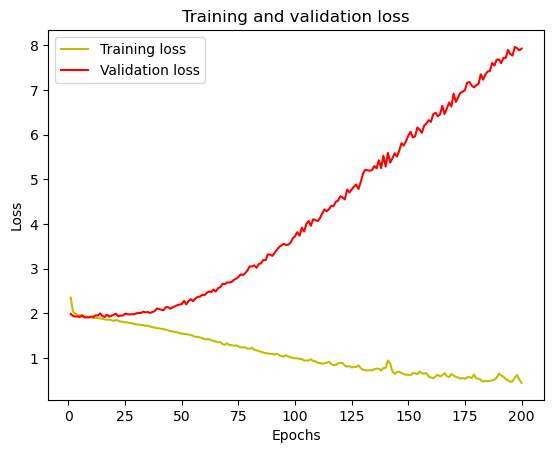

In [43]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

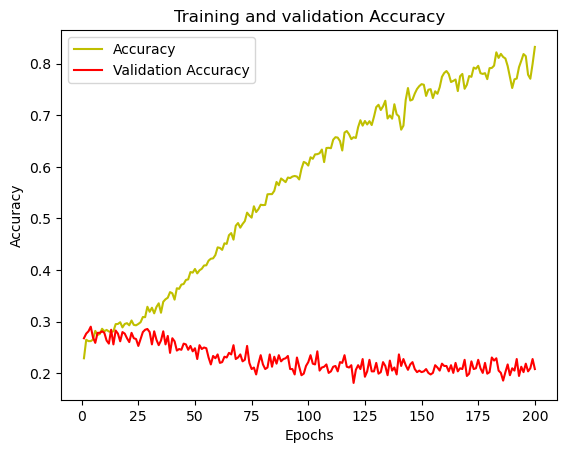

In [44]:
# Epoch에 따른 Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# 더 자세한 결과 확인
# model.compile()에서 'metrics'를 이용해서도 확인 가능할 것 같지만,
# 일단 배운대로만 진행함

from sklearn.metrics import classification_report, confusion_matrix

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

y_pred = model(X_test_scaled)
y_pred_probs = softmax(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print(classification_report(y_test_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           3       0.15      0.67      0.25         3
           4       0.50      0.46      0.48        13
           5       0.44      0.25      0.32        32
           6       0.30      0.50      0.37        48
           7       0.32      0.23      0.26        84
           8       0.23      0.26      0.25        99
           9       0.22      0.18      0.20       142
          10       0.24      0.21      0.22       139
          11       0.21      0.23      0.22        93
          12       0.09      0.10      0.09        51
          13       0.10      0.23      0.14        31
          14       0.04      0.04      0.04        26
          15       0.07      0.05      0.06        21
          16       0.06      0.08      0.07        13
          17       0.00      0.00      0.00         8
          18       0.20      0.08      0.12        12
          19       0.00      0.00      0.00         7
          20       0.00    

In [46]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

In [47]:
'''cf.
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''

'cf.\nTN  | True Negative(진음성)\nFN  | False Negative(위음성)\nFP  | False Positive(위양성)\nTP  | True Positive(진양성)\n'

### Accuracy가 낮게 나온 이유

* 추측1: sampling bias
* 추측2: outliar <- 얘는 그렇게 큰 영향 없을 듯